In [27]:
import os
import sys
sys.path.insert(0, os.path.abspath('../qbiome'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.style.use('ggplot')

from data_formatter import DataFormatter
from quantizer import Quantizer

In [28]:
dirname = 'example_data/'
data = dirname + 'SamplesByMetadata_otuDADA2_EMP_10249_ECAM_RSRC_TaxaRelativeAbundance.csv'
meta = dirname + 'SamplesByMetadata_otuDADA2_EMP_10249_ECAM_RSRC_Characteristics.csv'

# Instantiate the data formatter and the quantizer

In [29]:
formatter = DataFormatter()
quantizer = Quantizer()

# Load data using the data formatter

In [30]:
data = formatter.load_data(data, meta)

There are 29 unique biomes and 1216 unique samples
There are 311 unique days
There are 99 unique weeks


In [31]:
data.head()

,sample_id,subject_id,variable,week,value
7,MBSMPL0020-6-10,1,Actinobacteriota,27,0.366650
8,MBSMPL0020-6-10,1,Bacteroidota,27,0.507248
9,MBSMPL0020-6-10,1,Campilobacterota,27,0.002032
10,MBSMPL0020-6-10,1,Desulfobacterota,27,0.005058
11,MBSMPL0020-6-10,1,Firmicutes,27,0.057767


# Quantize the data

In [32]:
quantized = quantizer.quantize_df(data)

In [33]:
quantized.head()

,subject_id,Acidobacteriota_1,Acidobacteriota_9,Acidobacteriota_27,Acidobacteriota_31,Acidobacteriota_35,Actinobacteriota_1,Actinobacteriota_2,Actinobacteriota_3,Actinobacteriota_5,...,unclassified_Bacteria_10,unclassified_Bacteria_22,unclassified_Bacteria_27,unclassified_Bacteria_34,unclassified_Bacteria_36,unclassified_Bacteria_40,unclassified_Bacteria_57,unclassified_Bacteria_79,unclassified_Bacteria_80,unclassified_Bacteria_88
0,1,NaN,NaN,NaN,NaN,NaN,A,NaN,E,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN


# Plot a pie plot of the quantization results of `Actinobacteriota` during `week 1`

<AxesSubplot:ylabel='Actinobacteriota_1'>

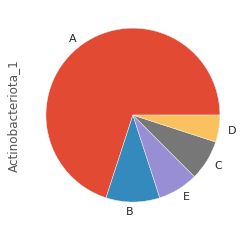

In [34]:
quantized['Actinobacteriota_1'].value_counts().plot.pie()

# Convert the quantized data frame to inputs that the Quasinet requires

In [35]:
features, label_matrix = quantizer.get_qnet_inputs(quantized)

In [36]:
features # feature labels for the qnet

Index(['Acidobacteriota_1', 'Acidobacteriota_9', 'Acidobacteriota_27',
       'Acidobacteriota_31', 'Acidobacteriota_35', 'Actinobacteriota_1',
       'Actinobacteriota_2', 'Actinobacteriota_3', 'Actinobacteriota_5',
       'Actinobacteriota_6',
       ...
       'unclassified_Bacteria_10', 'unclassified_Bacteria_22',
       'unclassified_Bacteria_27', 'unclassified_Bacteria_34',
       'unclassified_Bacteria_36', 'unclassified_Bacteria_40',
       'unclassified_Bacteria_57', 'unclassified_Bacteria_79',
       'unclassified_Bacteria_80', 'unclassified_Bacteria_88'],
      dtype='object', length=622)

In [37]:
label_matrix # data matrix to train the qnet on

array([['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ...,
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['E', '', '', ..., '', '', '']], dtype='<U1')

# Dequantize the label matrix to numeric values

In [38]:
dequantized = quantizer.dequantize_to_df(label_matrix)

In [39]:
dequantized.head()

,subject_id,Acidobacteriota_1,Acidobacteriota_27,Acidobacteriota_31,Acidobacteriota_35,Acidobacteriota_9,Actinobacteriota_1,Actinobacteriota_10,Actinobacteriota_11,Actinobacteriota_13,...,unclassified_Bacteria_27,unclassified_Bacteria_34,unclassified_Bacteria_36,unclassified_Bacteria_40,unclassified_Bacteria_57,unclassified_Bacteria_6,unclassified_Bacteria_7,unclassified_Bacteria_79,unclassified_Bacteria_80,unclassified_Bacteria_88
0,1,NaN,NaN,NaN,NaN,NaN,0.022298,NaN,0.323368,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,NaN,NaN,NaN,NaN,0.022298,NaN,NaN,0.560475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,NaN,NaN,NaN,NaN,NaN,0.022298,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,0.154592,NaN,NaN,0.187044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,NaN,0.022298,NaN,NaN,0.062255,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000345,NaN,NaN,NaN


# Melt the data frame into a format `seaborn` can plot easily

In [40]:
dequantized_plot = quantizer.melt_into_plot_format(dequantized)

In [41]:
dequantized_plot.head()

,subject_id,variable,week,value
0,1,Acidobacteriota,1,NaN
1,10,Acidobacteriota,1,NaN
2,11,Acidobacteriota,1,NaN
3,12,Acidobacteriota,1,NaN
4,14,Acidobacteriota,1,NaN


# Plotting example

In [42]:
BIOMES = ['Actinobacteriota', 'Bacteroidota', 'Firmicutes', 'Proteobacteria', 'unclassified_Bacteria']

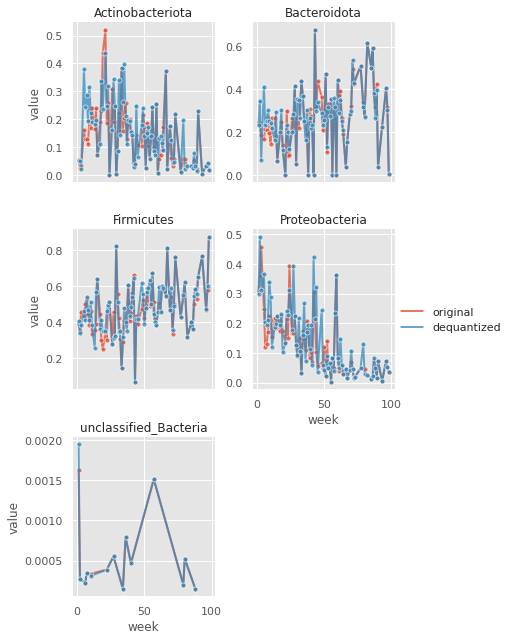

In [43]:
concat = pd.concat([
    data.assign(source='original'), 
    dequantized_plot.assign(source='dequantized')
])
concat = concat[concat.variable.isin(BIOMES)]

g = sns.FacetGrid(concat, col='variable', col_wrap=2, sharey=False, margin_titles=True)
g.map_dataframe(sns.lineplot, 'week', 'value', hue='source', ci=None, marker='o',
                    linewidth=2, alpha=0.75, markersize=5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()

From the plot above, we see there isn't much conversion distortion involved in our quantization-dequantization procedure.

We zoom in to look at the first 20 weeks.

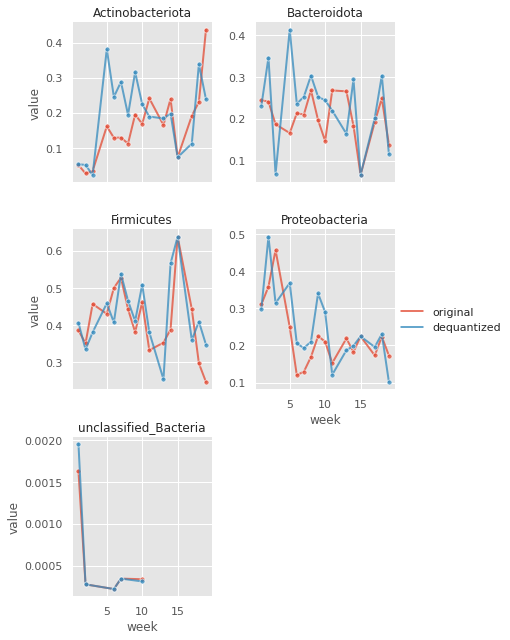

In [44]:
concat = concat[(concat.week <= 20)]

g = sns.FacetGrid(concat, col='variable', col_wrap=2, sharey=False, margin_titles=True)
g.map_dataframe(sns.lineplot, 'week', 'value', hue='source', ci=None, marker='o',
                    linewidth=2, alpha=0.75, markersize=5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()

# Use random forest regressors to reduce quantization-dequantization conversion distortion

We introduce a random forest regressor for each biome to further decrease the conversion distortion. Note that this random forest regressor can only be applied on a df that has been averaged, i.e., only has columns `variable, week, value`

In [45]:
# fit the random forest regressors for each biome
quantizer.fit_random_forest(data, dequantized_plot)

In [46]:
# apply the random forest regressor to the dequantized data frame
avg_regressed = quantizer.apply_random_forest_regressor(dequantized_plot)

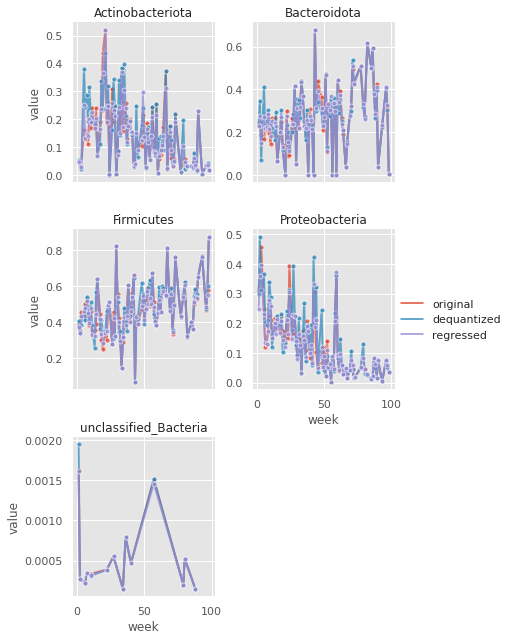

In [47]:
concat = pd.concat([
    data.assign(source='original'), 
    dequantized_plot.assign(source='dequantized'),
    avg_regressed.assign(source='regressed')
])
concat = concat[concat.variable.isin(BIOMES)]

g = sns.FacetGrid(concat, col='variable', col_wrap=2, sharey=False, margin_titles=True)
g.map_dataframe(sns.lineplot, 'week', 'value', hue='source', ci=None, marker='o',
                    linewidth=2, alpha=0.75, markersize=5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()

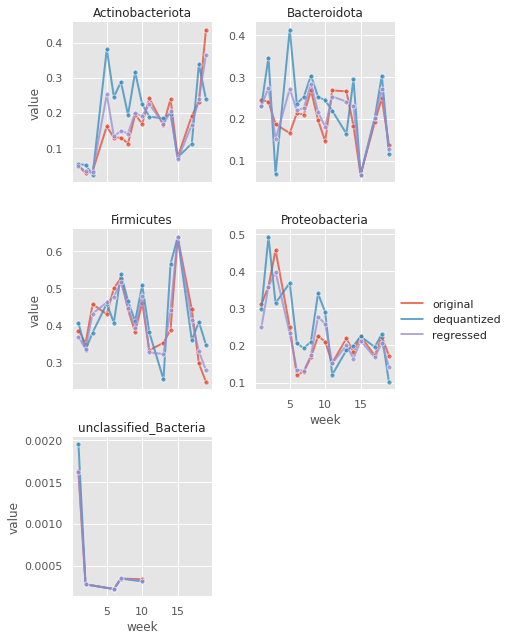

In [48]:
concat = concat[(concat.week <= 20)]

g = sns.FacetGrid(concat, col='variable', col_wrap=2, sharey=False, margin_titles=True)
g.map_dataframe(sns.lineplot, 'week', 'value', hue='source', ci=None, marker='o',
                    linewidth=2, alpha=0.75, markersize=5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()

# Save and load the states of the quantizer

In [49]:
quantizer.save_quantizer_states('quantizer.pkl')

In [50]:
new_quantizer = Quantizer()
new_quantizer.load_quantizer_states('quantizer.pkl')

We reproduce the plots above using loaded states. Note that we don't need to call `fit_random_forest` here to use `apply_random_forest_regressor`.

In [51]:
dequantized = new_quantizer.dequantize_to_df(label_matrix)
dequantized_plot = new_quantizer.melt_into_plot_format(dequantized)
avg_regressed = new_quantizer.apply_random_forest_regressor(dequantized_plot)

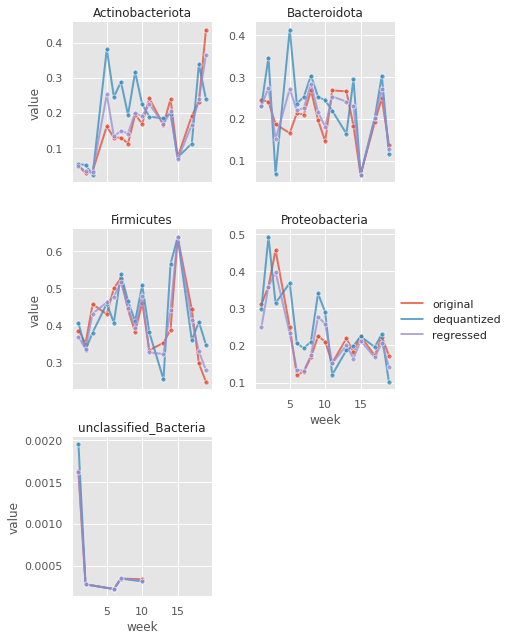

In [52]:
concat = pd.concat([
    data.assign(source='original'), 
    dequantized_plot.assign(source='dequantized'),
    avg_regressed.assign(source='regressed')
])
concat = concat[concat.variable.isin(BIOMES)]
concat = concat[(concat.week <= 20)]

g = sns.FacetGrid(concat, col='variable', col_wrap=2, sharey=False, margin_titles=True)
g.map_dataframe(sns.lineplot, 'week', 'value', hue='source', ci=None, marker='o',
                    linewidth=2, alpha=0.75, markersize=5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()